# Linear Regression to Predict Housing Prices

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [38]:
data = pd.read_csv('AmesHousing.tsv', delimiter = '\t')

In [39]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


I am going to create some useful modeling functions that I will continually update throughout the project. These will help me iterate through multiple model variations, finding the optimal feature selections and transformations.

In [40]:
train = data.iloc[:1460]
test = data.iloc[1460:]

In [41]:
def transform_features(data):
    return data

def select_features(data):
    feature_columns = data[['Gr Liv Area','SalePrice']]
    return feature_columns
    
def train_and_test(data):
    train = data.iloc[:1460]
    test = data.iloc[1460:]
    numerics = ['integer', 'float']
    features = data.select_dtypes(include=numerics).drop(['SalePrice'], axis = 1).columns
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions = lr.predict(test[features])
    test_mse = mean_squared_error(test['SalePrice'], test_predictions)
    test_rmse = np.sqrt(test_mse)
    return(test_rmse)

In [42]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.25161263909

Without altering the data and only selecting one feature, my model returns an error score of 57,088 on average from the actual sale price. I want to get this number much lower and have a much more accurate prediction model.

# Data Cleaning

### Removing columns with more than 40% missing values

In [43]:
print(len(data) * .4)

1172.0


In [44]:
null_values = data.isnull().sum()
null_columns = null_values[null_values > 0]
null_columns

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [45]:
null_over_40 = null_columns[null_columns > 1172]
null_over_40

Alley           2732
Fireplace Qu    1422
Pool QC         2917
Fence           2358
Misc Feature    2824
dtype: int64

In [46]:
def transform_features(data):
    new_train = data.drop(null_over_40.index, axis = 1)
    return new_train

In [47]:
transform_features(data).head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


I verified that my five columns with missing values over 40% have been removed using transform_features().

In [48]:
null_columns

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

### Replace remaining numeric missing values with column mean and mode

For the rest of my numeric columns, I will be replacing the data with the mean and the mode to ensure that both floats and integers get filled. I want to keep these columns by filling in the data because I value the potential impact that these features may have on predictions.

In [49]:
def transform_features(data):
    new_train = data.drop(null_over_40.index, axis = 1)
    new_train = new_train.fillna(new_train.mean())
    new_train = new_train.fillna(new_train.mode())
    return new_train

In [50]:
null_values = transform_features(data).isnull().sum()
null_columns = null_values[null_values > 0]
null_columns

Mas Vnr Type       23
Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin Type 2     81
Electrical          1
Garage Type       157
Garage Finish     159
Garage Qual       159
Garage Cond       159
dtype: int64

In [51]:
transform_features(data)[null_columns.index].dtypes

Mas Vnr Type      object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Electrical        object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
dtype: object

I still have some columns with missing value and these are all text columns.  I will also be dropping all of these columns from my dataframe rather than replacing the missing values with text.

# Feature Transformation

I suspect that one useful new feature would be to include the time in between Year Build and Year Remodled/Addition. If the outcome is 0, this means that no remodeling or addition was ever done on this home. Another feature I will create is age_sold, indicating the age of the house when it is sold.

I will also create a "to drop" list in my function for columns that I want to drop. I will begin by dropping the "PID" column. This column represents a placeholder on the map and is not useful for our model.

In [52]:
def transform_features(data):
    new_train = data.drop(null_over_40.index, axis = 1)
    new_train = new_train.fillna(new_train.mean())
    new_train = new_train.fillna(new_train.mode())
    new_train['years_until_remod'] = new_train['Year Remod/Add'] - new_train['Year Built']
    new_train['age_sold'] = new_train['Yr Sold'] - new_train['Year Built']
    
    # drop negative values of new features
    
    age = new_train['Yr Sold'] - new_train['Year Remod/Add']
    neg_age = age[age < 0]
    new_train = new_train.drop(neg_age.index, axis = 0)
    
    to_drop = ['PID', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'Mo Sold']
    new_train = new_train.drop(to_drop, axis = 1)
    return new_train.dropna()

transform_features(data).head(5)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Sale Type,Sale Condition,SalePrice,years_until_remod,age_sold
0,1,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,WD,Normal,215000,0,50
1,2,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,WD,Normal,105000,0,49
2,3,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,WD,Normal,172000,0,52
3,4,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,WD,Normal,244000,0,42
4,5,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,WD,Normal,189900,1,13


# Correlation Heatmap Matrix

The generation of a correlation heatmap matrix will give me a nice visual to quickly see the degree to which each column correlates with one another. The dark the color, the stronger the correlation. Ultimately, two columns that are extremely correlated likely convey the same information. I will want to remove extremely correlated features, as they contain duplicate features for my model.

To narrow down my correlation, I will set a cutoff of 0.3 as indicative of a significant correlation.

In [53]:
import seaborn as sns; sns.set()

tra_corrs = transform_features(data).corr()
sorted_corrs = abs(tra_corrs['SalePrice']).sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs

Wood Deck SF     0.310626
Open Porch SF    0.321822
Lot Frontage     0.347078
BsmtFin SF 1     0.419501
Fireplaces       0.452850
Mas Vnr Area     0.504753
Garage Yr Blt    0.526940
TotRms AbvGrd    0.527352
age_sold         0.546373
Full Bath        0.556536
Garage Area      0.635292
Total Bsmt SF    0.645120
1st Flr SF       0.645883
Garage Cars      0.653256
Gr Liv Area      0.728310
Overall Qual     0.795566
SalePrice        1.000000
Name: SalePrice, dtype: float64

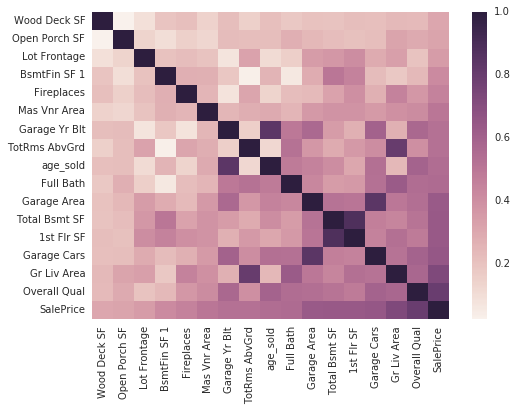

In [54]:
corrmat = abs(transform_features(data)[strong_corrs.index].corr())
sns.heatmap(corrmat)

By looking at the darkest areas of the matrix, not including the line that runs through the middle (columns correlating with themselves), we can see that the following columns correlate with one another the strongest:

Gr Liv Area and TotRms AbvGrd

Garage Area and Garage Cars

Age Sold and Garage Yr Blt

1st Flr SF and Total Bsmt SF

I will remove one column from each pair as they appear to convey very similar information about our homes. The other columns I will be dropping is Month and Years Sold, because these pieces of information leak data about the final sale. When using my model on future data, I will not yet know the actual date it will be sold.

In [55]:
def transform_features(data):
    new_train = data.drop(null_over_40.index, axis = 1)
    new_train = new_train.fillna(new_train.mean())
    new_train = new_train.fillna(new_train.mode())
    new_train['years_until_remod'] = new_train['Year Remod/Add'] - new_train['Year Built']
    new_train['age_sold'] = new_train['Yr Sold'] - new_train['Year Built']
    
    # drop negative values of new features
    
    age = new_train['Yr Sold'] - new_train['Year Remod/Add']
    neg_age = age[age < 0]
    new_train = new_train.drop(neg_age.index, axis = 0)
    
    to_drop = ['PID', 'TotRms AbvGrd', 'Garage Area', 'Mo Sold', 'Yr Sold', 'Garage Yr Blt', 'Total Bsmt SF']
    new_train = new_train.drop(to_drop, axis = 1)
    return new_train.dropna()

transform_features(data).head(5)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Sale Type,Sale Condition,SalePrice,years_until_remod,age_sold
0,1,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,WD,Normal,215000,0,50
1,2,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,WD,Normal,105000,0,49
2,3,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,WD,Normal,172000,0,52
3,4,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,WD,Normal,244000,0,42
4,5,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,WD,Normal,189900,1,13


### Removing columns with low variance

Features with little variation in their data do not meaninfully contribute to my model and can be dropped. 

To measure the variance of my feature columns, first I will standardize all columns so that they all vary between 0 and 1, then I will use pandas.var() to compute the variance of each column.

The closer the variance is to 0, the less valuable the data is to my model. If the variance is somehow at exactly 0, this means that every number in the column is the same. I will check the variance of my numeric columns.

In [56]:
df = transform_features(data)
numerics = ['integer', 'float']
features = df.select_dtypes(include=numerics).drop(['SalePrice'], axis = 1).columns
best_features = df[features]
unit_train = (best_features - best_features.min()) / (best_features.max() - best_features.min())
sorted_vars = unit_train.var().sort_values()
sorted_vars

Misc Val             0.000981
Lot Area             0.001412
Low Qual Fin SF      0.001583
Pool Area            0.001986
3Ssn Porch           0.002591
Kitchen AbvGr        0.003195
Enclosed Porch       0.003992
Lot Frontage         0.005249
BsmtFin SF 1         0.006388
1st Flr SF           0.007925
Wood Deck SF         0.008138
Gr Liv Area          0.008889
Screen Porch         0.009989
Open Porch SF        0.012891
Mas Vnr Area         0.012975
BsmtFin SF 2         0.013220
Bsmt Half Bath       0.015176
Bedroom AbvGr        0.017330
Overall Cond         0.017870
Full Bath            0.018839
Fireplaces           0.026434
Garage Cars          0.026626
Overall Qual         0.028456
years_until_remod    0.034146
Bsmt Unf SF          0.034757
2nd Flr SF           0.043519
Year Built           0.050814
age_sold             0.052518
MS SubClass          0.059930
Half Bath            0.063394
Bsmt Full Bath       0.068052
Order                0.083578
Year Remod/Add       0.116581
dtype: flo

Now I have a list, sorted by degree of variance, of my top features. I will set a variance cutoff of 0.005 and eliminate those features.

In [57]:
variance_todrop = sorted_vars[sorted_vars < 0.005]
variance_todrop

Misc Val           0.000981
Lot Area           0.001412
Low Qual Fin SF    0.001583
Pool Area          0.001986
3Ssn Porch         0.002591
Kitchen AbvGr      0.003195
Enclosed Porch     0.003992
dtype: float64

## Creating dummy columns

To use text columns in my data, I am going to convert object columns to category type and create dummy columns from them. This enables them to be read as a number and used in the model. I will only be creating dummy columns from my text columns with no missing values.

In [58]:
text_cols = transform_features(data).select_dtypes(include=['object']).columns
text_cols

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [59]:
def transform_features(data):
    new_train = data.drop(null_over_40.index, axis = 1)
    new_train = new_train.fillna(new_train.mean())
    new_train = new_train.fillna(new_train.mode())
    new_train['years_until_remod'] = new_train['Year Remod/Add'] - new_train['Year Built']
    new_train['age_sold'] = new_train['Yr Sold'] - new_train['Year Built']
    
    # drop negative values of new features
    
    age = new_train['Yr Sold'] - new_train['Year Remod/Add']
    neg_age = age[age < 0]
    new_train = new_train.drop(neg_age.index, axis = 0)
    
    to_drop = ['PID', 'TotRms AbvGrd', 'Garage Area', 'Mo Sold', 'Yr Sold', 'Garage Yr Blt', 'Total Bsmt SF']
    new_train = new_train.drop(to_drop, axis = 1)
    new_train = new_train.drop(variance_todrop.index, axis = 1)
    
    # create dummy columns
    
    null_counts = new_train.isnull().sum()
    series = null_counts[null_counts == 0]
    df_no_mv = new_train[series.index]
    text_cols = df_no_mv.select_dtypes(include=['object']).columns
    
    for col in text_cols:
        new_train[col] = new_train[col].astype('category')
        dum_col = pd.get_dummies(new_train[col])
        new_train = pd.concat([new_train, dum_col], axis = 1)
        del new_train[col]
        
    # changing duplicate column names
    
    cols = pd.Series(new_train.columns)
    for dup in new_train.columns.get_duplicates(): cols[new_train.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(new_train.columns.get_loc(dup).sum())]
    new_train.columns = cols
        
    return new_train.dropna()

transform_features(data).head(5)

,Order,MS SubClass,Lot Frontage,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Bsmt Qual,...,New,Oth,VWD,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,20,141.0,6,5,1960,1960,Stone,112.0,TA,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,5,6,1961,1961,None,0.0,TA,...,0,0,0,1,0,0,0,0,1,0
2,3,20,81.0,6,6,1958,1958,BrkFace,108.0,TA,...,0,0,0,1,0,0,0,0,1,0
3,4,20,93.0,7,5,1968,1968,None,0.0,TA,...,0,0,0,1,0,0,0,0,1,0
4,5,60,74.0,5,5,1997,1998,None,0.0,Gd,...,0,0,0,1,0,0,0,0,1,0


In [60]:
tra_corrs = transform_features(data).corr()
sorted_corrs = abs(tra_corrs['SalePrice']).sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs

Wood Deck SF      0.310626
Open Porch SF     0.321822
VinylSd           0.325223
VinylSd.1         0.325659
TA                0.345873
Partial           0.346878
Lot Frontage      0.347078
New               0.351936
CBlock.1          0.379244
BsmtFin SF 1      0.419501
Gd.1              0.424822
NridgHt           0.431803
Ex                0.445704
Fireplaces        0.452850
Ex.3              0.491756
Mas Vnr Area      0.504753
PConc             0.516934
Year Remod/Add    0.525990
TA.3              0.531192
Year Built        0.545849
age_sold          0.546373
Ex.3              0.548992
Full Bath         0.556536
TA.2              0.594741
1st Flr SF        0.645883
Garage Cars       0.653256
Gr Liv Area       0.728310
Overall Qual      0.795566
SalePrice         1.000000
Name: SalePrice, dtype: float64

# Selecting Features

Next I will start selecting features that correlate the strongest with SalePrice and begin testing my model. With my pipeline of fuctions that I created, it will be quick to test multiple iterations.

To begin, I will include all features that correlate with SalePrice greater than 0.3.

In [61]:
def transform_features(data):
    new_train = data.drop(null_over_40.index, axis = 1)
    new_train = new_train.fillna(new_train.mean())
    new_train = new_train.fillna(new_train.mode())
    new_train['years_until_remod'] = new_train['Year Remod/Add'] - new_train['Year Built']
    new_train['age_sold'] = new_train['Yr Sold'] - new_train['Year Built']
    
    # drop negative values of new features
    
    age = new_train['Yr Sold'] - new_train['Year Remod/Add']
    neg_age = age[age < 0]
    new_train = new_train.drop(neg_age.index, axis = 0)
    
    to_drop = ['PID', 'TotRms AbvGrd', 'Garage Area', 'Mo Sold', 'Yr Sold', 'Garage Yr Blt', 'Total Bsmt SF']
    new_train = new_train.drop(to_drop, axis = 1)
    new_train = new_train.drop(variance_todrop.index, axis = 1)
    
    # create dummy columns
    
    null_counts = new_train.isnull().sum()
    series = null_counts[null_counts == 0]
    df_no_mv = new_train[series.index]
    text_cols = df_no_mv.select_dtypes(include=['object']).columns
    
    for col in text_cols:
        new_train[col] = new_train[col].astype('category')
        dum_col = pd.get_dummies(new_train[col])
        new_train = pd.concat([new_train, dum_col], axis = 1)
        del new_train[col]
        
    # changing duplicate column names
    
    cols = pd.Series(new_train.columns)
    for dup in new_train.columns.get_duplicates(): cols[new_train.columns.get_loc(dup)]=[dup+'.'+str(d_idx) if d_idx!=0 else dup for d_idx in range(new_train.columns.get_loc(dup).sum())]
    new_train.columns = cols
        
    return new_train.dropna()

def select_features(data):
    corrs = data.corr()
    sorted_corrs = abs(corrs['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > 0.3]
    new_features = data[strong_corrs.index]
    return new_features

def train_and_test(data):
    train = data.iloc[:1460]
    test = data.iloc[1460:]
    numerics = ['integer', 'float']
    features = data.select_dtypes(include=numerics).drop(['SalePrice'], axis = 1).columns
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions = lr.predict(test[features])
    test_mse = mean_squared_error(test['SalePrice'], test_predictions)
    test_rmse = np.sqrt(test_mse)
    return(test_rmse)


In [62]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

31604.355412731456

### Comparing with top 5 features

Currently my model takes in quite a lot of features, all with corellations above 0.3. I will compares a simplier model using only the top five features.

In [63]:
top_five = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', '1st Flr SF', 'TA.3']

In [64]:
def select_features(data):
    top_five = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', '1st Flr SF', 'TA.3']
    new_features = data[top_five]
    return new_features

In [65]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

36775.423764075684

By only including the top five features, my model is considerably less accurate.

### Experimenting with correlation coefficient.

Next, I will try altering the correlation coefficient cuttoff for features above and below 0.3 to see if the RMSE score improves.

In [66]:
def select_features(data):
    corrs = data.corr()
    sorted_corrs = abs(corrs['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > 0.4]
    new_features = data[strong_corrs.index]
    return new_features

In [67]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

32035.36307641674

In [68]:
def select_features(data):
    corrs = data.corr()
    sorted_corrs = abs(corrs['SalePrice']).sort_values()
    strong_corrs = sorted_corrs[sorted_corrs > 0.19]
    new_features = data[strong_corrs.index]
    return new_features

In [69]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

29789.14720447058

From experimenting with the correlation coeffient cutoff of which features to include, .19 gives me the most accurate model.

# Improving Training and Testing

I will update my function to include an option for holdout validation or cross validation, specifying the number of folds to use.

In [70]:
def train_and_test(data, k=0):
    numerics = ['integer', 'float']
    features = data.select_dtypes(include=numerics).drop(['SalePrice'], axis = 1).columns
    lr = LinearRegression()
    shuff_data = data.sample(frac=1, random_state = 1)
    
    if k==0:
        train = data.iloc[:1460]
        test = data.iloc[1460:]
        lr.fit(train[features], train['SalePrice'])
        test_predictions = lr.predict(test[features])
        test_mse = mean_squared_error(test['SalePrice'], test_predictions)
        test_rmse = np.sqrt(test_mse)
        return(test_rmse)
    
    if k==1:
        fold_one = shuff_data[:1460]
        fold_two = shuff_data[1460:]
        
        lr.fit(fold_one[features], fold_one['SalePrice'])
        predictions1 = lr.predict(fold_two[features])
        mse1 = mean_squared_error(fold_two['SalePrice'], predictions1)
        rmse1 = np.sqrt(mse1)
        
        lr.fit(fold_two[features], fold_two['SalePrice'])
        predictions2 = lr.predict(fold_one[features])
        mse2 = mean_squared_error(fold_one['SalePrice'], predictions2)
        rmse2 = np.sqrt(mse2)
        
        avg_rmse = np.mean([rmse2, rmse1])
        print(rmse1, rmse2, avg_rmse)
        return(avg_rmse)
    
    else:
        kf = KFold(n_splits=k)
        rmse_values = []
        for train_index, test_index, in kf.split(shuff_data):
            train = shuff_data.iloc[train_index]
            test = shuff_data.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

### Predictions using one fold.

In [71]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=1)

rmse

33180.2384302497 28199.601137006528 30689.919783628116


30689.919783628116

### Predictions using 4 folds.

In [72]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

[25096.985237651163, 28107.292254038508, 38480.67061319323, 27382.013554264053]


29766.74041478674

Performing cross validation, my model returns an average rmse score of 29,766. This means that on average, my model predicts housing prices by a deviation of $29,766 from the actual price. This seems like a reasonably accurate model for estimating a home's sale price.